In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl
import json
import folium

In [2]:
# deprecate 관련 경고는 무시하도록 설정
import warnings
warnings.filterwarnings('ignore')

In [3]:
fontpath = '/usr/share/fonts/NanumGothic.ttf'

mpl.font_manager.FontProperties(fname=fontpath)
# 한글이 안보이면 위 라인을 주석치고 실행했다가
# 다시 주석해제 후 실행

mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.unicode_minus'] = False

In [4]:
gu_park = pd.read_csv("df_gu_park.csv")

total = gu_park['면적비율'].sum()

gu_park['공원 백분율'] = ((gu_park['면적비율']/total).apply('{:.0%}'.format))
gu_park["공원 백분율"] = gu_park["공원 백분율"].str.replace("%", "", regex=True)
gu_park["공원 백분율"] = pd.to_numeric(gu_park["공원 백분율"])
gu_park = gu_park[['구', '공원 백분율']]
gu_park

,구,공원 백분율
0,강남구,3
1,강동구,2
2,강북구,5
3,강서구,2
4,관악구,11
5,광진구,1
6,구로구,2
7,금천구,0
8,노원구,10
9,도봉구,2


In [5]:
gu_subway = pd.read_csv("df_gu_subway.csv")

total = gu_subway['면적비율'].sum()

gu_subway['지하철 백분율'] = ((gu_subway['면적비율']/total).apply('{:.0%}'.format))
gu_subway["지하철 백분율"] = gu_subway["지하철 백분율"].str.replace("%", "", regex=True)
gu_subway["지하철 백분율"] = pd.to_numeric(gu_subway["지하철 백분율"])
gu_subway = gu_subway[['구', '지하철 백분율']]
gu_subway

,구,지하철 백분율
0,강남구,5
1,강동구,3
2,강북구,1
3,강서구,2
4,관악구,1
5,광진구,4
6,구로구,4
7,금천구,2
8,노원구,3
9,도봉구,3


In [6]:
gu_store = pd.read_csv("df_gu_store.csv")

total = gu_store['면적비율'].sum()

gu_store['편의시설 백분율'] = ((gu_store['면적비율']/total).apply('{:.0%}'.format))
gu_store["편의시설 백분율"] = gu_store["편의시설 백분율"].str.replace("%", "", regex=True)
gu_store["편의시설 백분율"] = pd.to_numeric(gu_store["편의시설 백분율"])
gu_store = gu_store[['구', '편의시설 백분율']]
gu_store

,구,편의시설 백분율
0,서대문구,3
1,서초구,1
2,중랑구,3
3,도봉구,3
4,동작구,3
5,종로구,3
6,노원구,2
7,강북구,3
8,관악구,3
9,금천구,6


In [7]:
gu_police = pd.read_csv("df_gu_police.csv")

total = gu_police['면적비율'].sum()

gu_police['경찰서 백분율'] = ((gu_police['면적비율']/total).apply('{:.0%}'.format))
gu_police["경찰서 백분율"] = gu_police["경찰서 백분율"].str.replace("%", "", regex=True)
gu_police["경찰서 백분율"] = pd.to_numeric(gu_police["경찰서 백분율"])
gu_police = gu_police[['구', '경찰서 백분율']]
gu_police

,구,경찰서 백분율
0,강남구,2
1,강동구,4
2,강북구,4
3,강서구,2
4,관악구,3
5,광진구,6
6,구로구,4
7,금천구,4
8,노원구,2
9,도봉구,4


In [8]:
gu_hospital = pd.read_csv("df_gu_hospital.csv")

total = gu_hospital['면적비율'].sum()

gu_hospital['병원 백분율'] = ((gu_hospital['면적비율']/total).apply('{:.0%}'.format))
gu_hospital["병원 백분율"] = gu_hospital["병원 백분율"].str.replace("%", "", regex=True)
gu_hospital["병원 백분율"] = pd.to_numeric(gu_hospital["병원 백분율"])
gu_hospital = gu_hospital[['구', '병원 백분율']]
gu_hospital

,구,병원 백분율
0,강남구,8
1,강동구,6
2,강북구,3
3,강서구,4
4,관악구,3
5,광진구,3
6,구로구,4
7,금천구,5
8,노원구,3
9,도봉구,3


In [9]:
df = pd.merge(gu_park, gu_subway, on='구')
df = pd.merge(df, gu_store, on='구')
df = pd.merge(df, gu_police, on='구')
df = pd.merge(df, gu_hospital, on='구')
df

,구,공원 백분율,지하철 백분율,편의시설 백분율,경찰서 백분율,병원 백분율
0,강남구,3,5,3,2,8
1,강동구,2,3,3,4,6
2,강북구,5,1,3,4,3
3,강서구,2,2,2,2,4
4,관악구,11,1,3,3,3
5,광진구,1,4,6,6,3
6,구로구,2,4,5,4,4
7,금천구,0,2,6,4,5
8,노원구,10,3,2,2,3
9,도봉구,2,3,3,4,3


In [10]:
df['총합'] = df['공원 백분율'] + df['지하철 백분율'] + df['편의시설 백분율'] + df['경찰서 백분율'] + df['병원 백분율']
df

,구,공원 백분율,지하철 백분율,편의시설 백분율,경찰서 백분율,병원 백분율,총합
0,강남구,3,5,3,2,8,21
1,강동구,2,3,3,4,6,18
2,강북구,5,1,3,4,3,16
3,강서구,2,2,2,2,4,12
4,관악구,11,1,3,3,3,21
5,광진구,1,4,6,6,3,20
6,구로구,2,4,5,4,4,19
7,금천구,0,2,6,4,5,17
8,노원구,10,3,2,2,3,20
9,도봉구,2,3,3,4,3,15


In [11]:
total = df['총합']
total.values

array([21, 18, 16, 12, 21, 20, 19, 17, 20, 15, 31, 23, 17, 20, 17, 21, 14,
       21, 18, 18, 13, 14, 20, 49, 29])

In [12]:
from matplotlib import pyplot

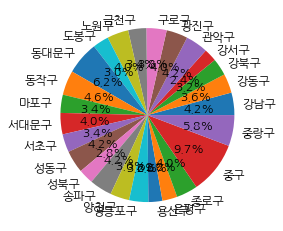

In [13]:
total = df['총합'].values
labels = df['구'].values

plt.pie(total, labels=labels, autopct='%.1f%%')
pyplot.rcParams["figure.figsize"] = (30,30)
plt.show()

<AxesSubplot:title={'center':'구별 합산점수 백분위'}>

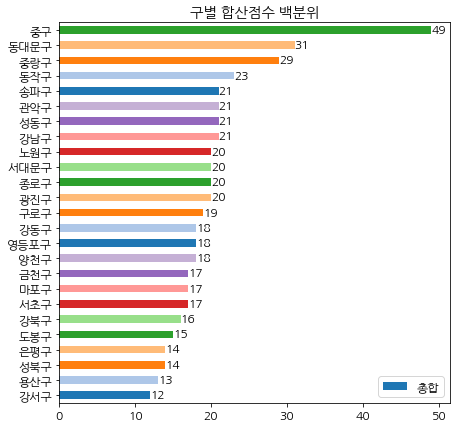

In [14]:
df = df.sort_values(by=['총합'], ascending=True)
ax = df.plot.barh(figsize=(7,7), x='구', y='총합', xlabel='', ylabel='총합', 
                  color=plt.cm.tab20(np.arange(10)), title='구별 합산점수 백분위'
                  )

# annotate(표시할값, x좌표, y좌표, 옵션)
for p in ax.patches: 
    ax.annotate(p.get_width(), (p.get_x()+p.get_width(), p.get_y()+0.05) )
ax

In [15]:
with open('seoul_geo_simple.json', 'rt', encoding='UTF8') as f:
    seoul_geo = json.load(f)

In [16]:
seoul_geo['features'][0]['properties']

{'code': '11250',
 'name': '강동구',
 'name_eng': 'Gangdong-gu',
 'base_year': '2013'}

In [17]:
center = [37.541, 126.986]
m = folium.Map(location=center, tiles='cartodbpositron', zoom_start=10)

folium.Choropleth(
    geo_data=seoul_geo,
    data=df, 
    columns=('구', '총합'), 
    key_on='feature.properties.name',
    fill_color='BuPu'
).add_to(m)

m

In [18]:
df_index = df[df['구'] == '중구'].index
df = df.drop(df_index)
df

,구,공원 백분율,지하철 백분율,편의시설 백분율,경찰서 백분율,병원 백분율,총합
3,강서구,2,2,2,2,4,12
20,용산구,0,5,4,3,1,13
16,성북구,1,2,5,3,3,14
21,은평구,3,3,3,1,4,14
9,도봉구,2,3,3,4,3,15
2,강북구,5,1,3,4,3,16
14,서초구,9,2,1,2,3,17
12,마포구,3,5,4,3,2,17
7,금천구,0,2,6,4,5,17
18,양천구,2,2,5,5,4,18


<AxesSubplot:title={'center':'구별 합산점수 백분위'}>

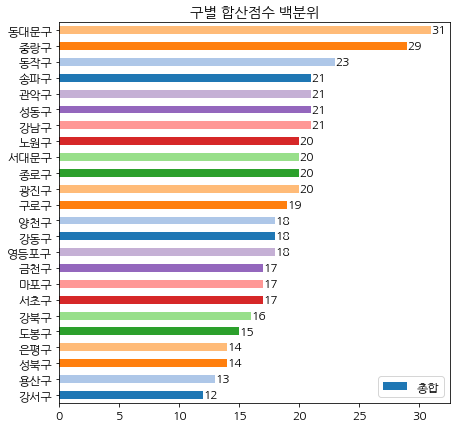

In [19]:
df = df.sort_values(by=['총합'], ascending=True)
ax = df.plot.barh(figsize=(7,7), x='구', y='총합', xlabel='', ylabel='총합', 
                  color=plt.cm.tab20(np.arange(10)), title='구별 합산점수 백분위'
                  )

# annotate(표시할값, x좌표, y좌표, 옵션)
for p in ax.patches: 
    ax.annotate(p.get_width(), (p.get_x()+p.get_width(), p.get_y()+0.05) )
ax

In [20]:
center = [37.541, 126.986]
m = folium.Map(location=center, tiles='cartodbpositron', zoom_start=10)

folium.Choropleth(
    geo_data=seoul_geo,
    data=df, 
    columns=('구', '총합'), 
    key_on='feature.properties.name',
    fill_color='BuPu'
).add_to(m)

m